In [1]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tools import add_constant
import numpy as np
from sklearn.metrics import confusion_matrix, auc, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
HOF_dat = pd.read_csv("https://s3-us-west-2.amazonaws.com/static-resources.zybooks.com/hof.csv")
Y = HOF_dat.HOF
X = HOF_dat.Hits
X = add_constant(X)

In [3]:
HOF_dat

,Hits,HOF
0,972,0
1,989,0
2,1007,0
3,1030,0
4,1041,0
...,...,...
769,3514,1
770,3630,1
771,3771,1
772,4189,1


<AxesSubplot:xlabel='Hits', ylabel='HOF'>

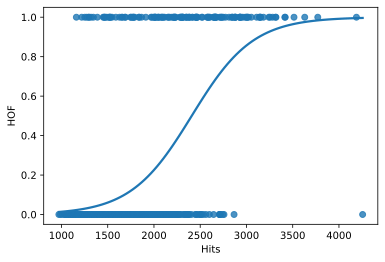

In [4]:
sns.regplot(x = HOF_dat.Hits, y = HOF_dat.HOF, logistic=True, ci=None)

In [5]:
mod_hit = sm.GLM(Y, X, family=sm.families.Binomial()).fit()

In [6]:
pihat = mod_hit.fittedvalues
i = 0
classHOF = pihat

while i < len(Y):
    classHOF[i] = 0 if pihat[i] < 0.5 else 1
    i += 1

In [7]:
mod_hit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    HOF   No. Observations:                  774
Model:                            GLM   Df Residuals:                      772
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 02 Jun 2022   Deviance:                       8473.5
Time:                        14:24:25   Pearson chi2:                 4.14e+17
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2787      0.517    -14.077      0.000      -8.292      -6.265
Hits           0.0030      0.000     12.118      0.000       0.003       0.004
==============================================================================
"""

In [8]:
conf_mat = confusion_matrix(Y, classHOF)

print(conf_mat)

[[615  18]
 [ 74  67]]


In [9]:
HOF_dat = pd.read_csv("https://static-resources.zybooks.com/hof.csv")
Y = HOF_dat.HOF
X = HOF_dat.Hits
X = add_constant(X)
mod_hit = sm.GLM(Y, X, family=sm.families.Binomial()).fit()
preds = mod_hit.fittedvalues
fpr, tpr, _ = roc_curve(Y, preds)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr, tpr)
plt.show()

In [11]:
preds

0      0.012857
1      0.013526
2      0.014271
3      0.015283
4      0.015791
         ...   
769    0.965842
770    0.975698
771    0.983996
772    0.995423
773    0.996259
Length: 774, dtype: float64

In [10]:
auc = auc(fpr,tpr)
print("AUC = ", auc)

AUC =  0.8576742518458763
